 # Import des packages

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2

# Construction du modèle 

In [17]:
# MNIST a 10 classes différentes
num_classes = 10

# Les données sont des images 28x28 en niveau de gris
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3200)             

# Chargement du modèle

In [18]:
model.load_weights("model.h5")

# Test du modèle

In [19]:
def test_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = img.astype('float32')
    img = img / 255.0
    img = np.expand_dims(img, -1)
    pred = model.predict(np.array([img]))
    plt.imshow(img)
    print("Prédiction : ", np.argmax(pred))

1/1 [==============================] - 0s 66ms/step
Prédiction :  7


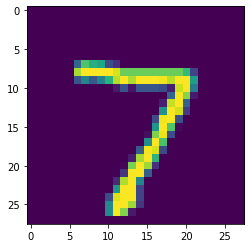

In [20]:
test_image("test1.png")

1/1 [==============================] - 0s 39ms/step
Prédiction :  2


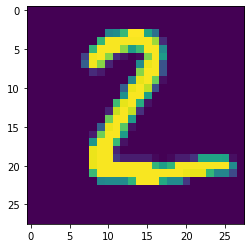

In [21]:
test_image("test2.png")

1/1 [==============================] - 0s 29ms/step
Prédiction :  1


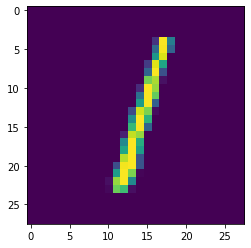

In [22]:
test_image("test3.png")